# Data Preparation

## 1. Python basics - recap and some new things

### 1.1 Import and present data

Datasets are usually textual files, consisting of a structured data representation:
* rows - feature vectors (different samples of data)
* columns - features (data representations)

Most common format is .csv

In [1]:
# Here are several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "./input/" directory.


In [2]:
# Import data
data = pd.read_csv('./input/pokemon.csv')

# Display first 5 rows (feature vectors)
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
# Display custom number of heading rows
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [4]:
# List column names (features)
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
# Display basic data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
# Calculate and display a correlation between features
# data.corr()
# the code needs to change because data.corr() only works for numeric values 

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation
correlation_matrix = numeric_data.corr()
print(correlation_matrix)



                   #        HP    Attack   Defense   Sp. Atk   Sp. Def  \
#           1.000000  0.097712  0.102664  0.094691  0.089199  0.085596   
HP          0.097712  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.102664  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.094691  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.089199  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.085596  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.012181  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.983428  0.058683  0.051451  0.042419  0.036437  0.028486   

               Speed  Generation  
#           0.012181    0.983428  
HP          0.175952    0.058683  
Attack      0.381240    0.051451  
Defense     0.015227    0.042419  
Sp. Atk     0.473018    0.036437  
Sp. Def     0.259133    0.028486  
Speed       1.000000   -0.023121  
Generation -0.023121    1.000000  


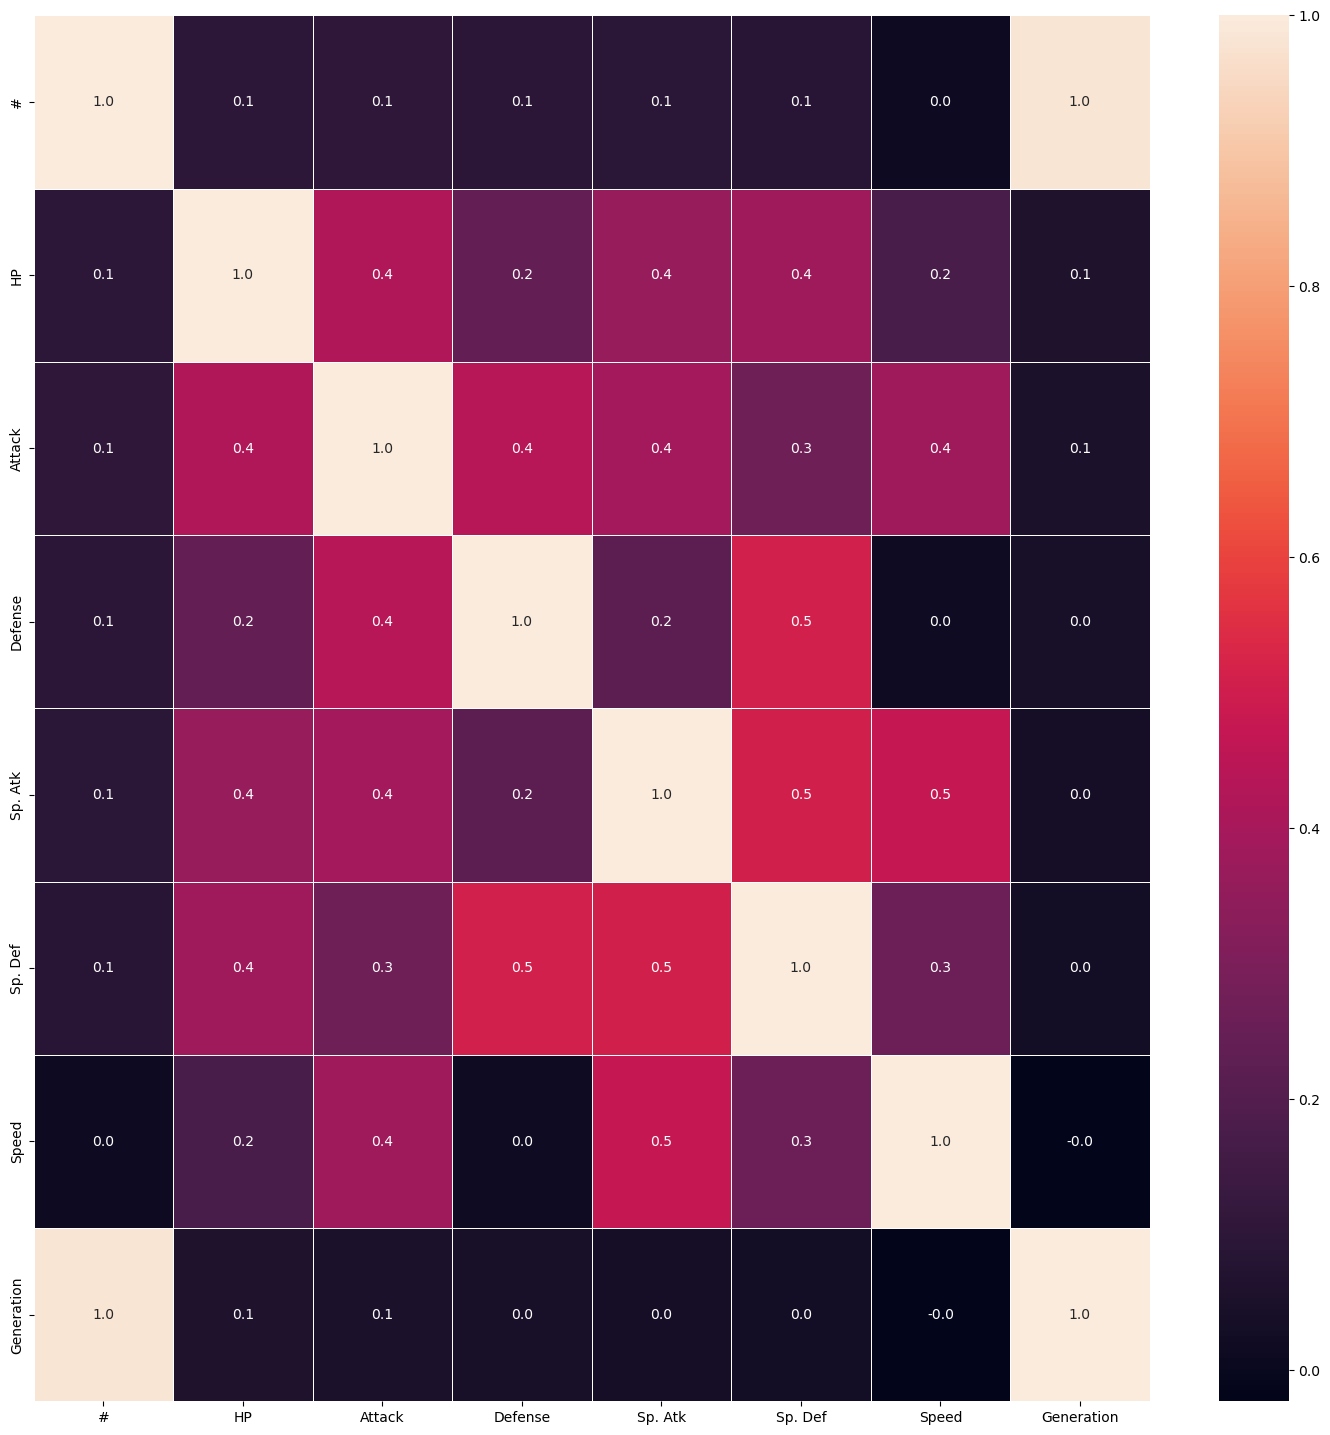

In [7]:
# Display a correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### 1.2 MATPLOTLIB

Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.
* Line plot is commonly used when x axis is time.
* Scatter is commonly used when there is correlation between two variables
* Histogram is commonly used when we need to see distribution of numerical data.
* Customization: Colors, labels, thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle  

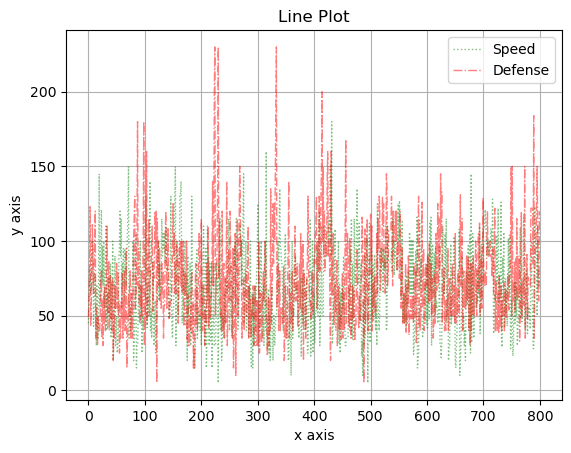

In [8]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

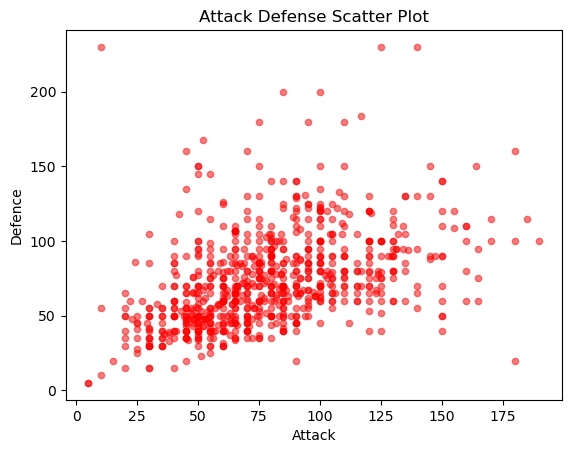

In [9]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot
plt.show()

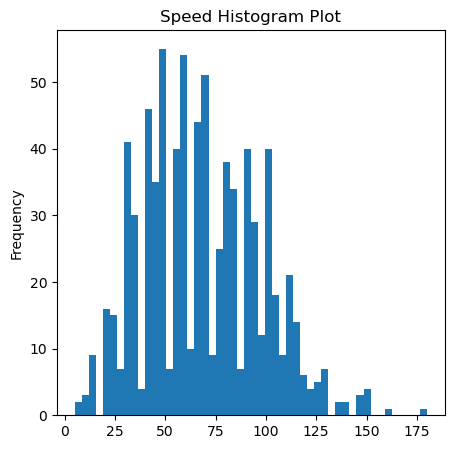

In [10]:
# Histogram
# bins = number of bars in the figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (5,5))
plt.title('Speed Histogram Plot') 
plt.show()

In [11]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 640x480 with 0 Axes>

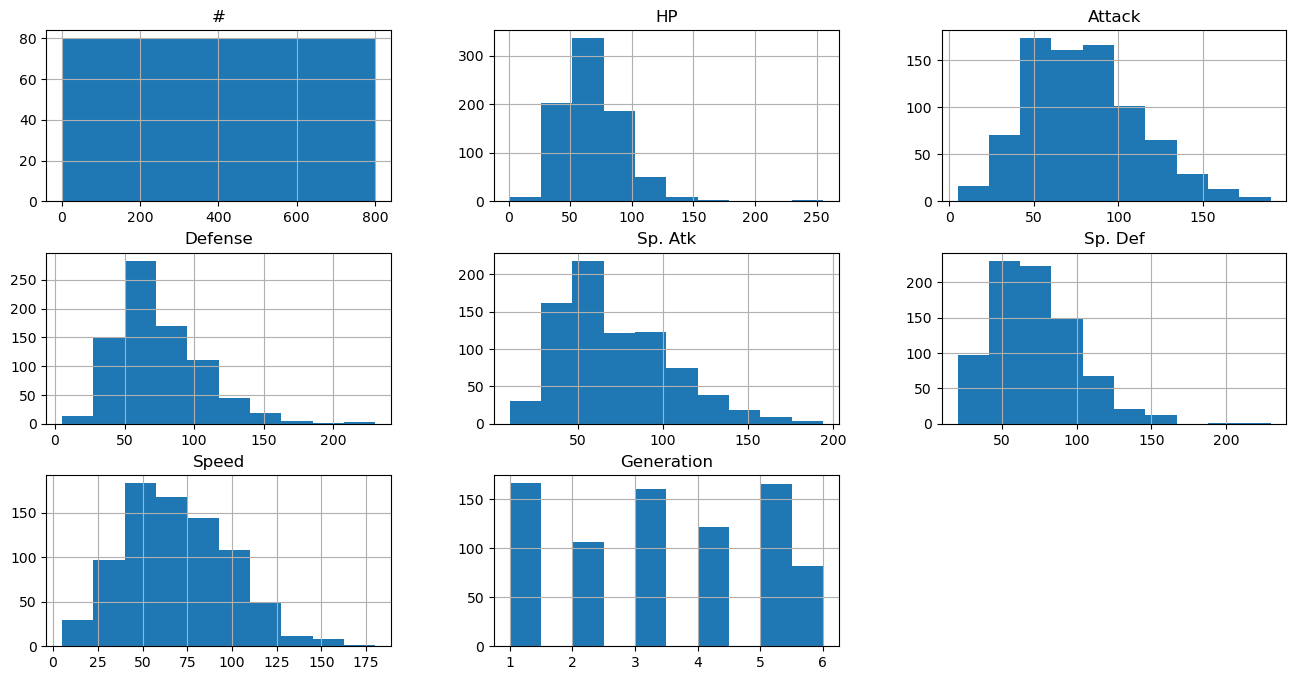

In [12]:
# Creating histogram subplots 
histograms = data.hist(figsize=(16,8))
plt.show()

### 1.3 PANDAS

Expected input?
* CSV: comma - separated values



In [13]:
# Read data
data = pd.read_csv('./input/pokemon.csv')


In [14]:
# Series vs. dataframes
    # Series: 1D labeled array
    # DataFrame: 2D labeled tabular structure
    
series = data['Defense']        # data['Defense'] = series
print(type(series))

data_frame = data[['Defense']]  # data[['Defense']] = data frame
print(type(data_frame))


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


**Logic, control flow** and **filtering.**
* Comparison operator:  ==, <, >, <=
* Boolean operators: and, or ,not
* Filtering pandas

In [15]:
# Comparison operator
print(3 > 2)
print(3!=2)

# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [16]:
# Filtering Pandas data frame
x = data['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [17]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [18]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


### 1.4 WHILE and FOR LOOPS


In [19]:
# Stay in loop if condition (i is not equal 5) is true
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [20]:
# Stay in loop if condition is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')


i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris



## 2. Data preparation

### 2.1 Diagnose data for cleaning
We need to diagnose and clean data before exploring.

Unclean data:
* Column name inconsistency like upper-lower case letter or space between words
* Missing data
* NaN values

<br> We will use head, tail, columns, shape and info methods to diagnose data


In [21]:
data = pd.read_csv('./input/pokemon.csv')
data.head()  # head shows first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [22]:
# tail shows last 5 rows
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [23]:
# columns gives column names of features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [24]:
# shape gives number of rows and columns
data.shape

(800, 12)

In [25]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


### 2.2 Exploratory data analysis (EDA)

value_counts(): Frequency counts

We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in **middle** of the sequence. In this case it would be 11.

* The lower quantile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* The upper quantile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [26]:
# For example - frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that will also be counted
# As it can be seen below there are 112 water pokemons or 70 grass pokemons

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


In [27]:
# Basic data statistics
data.describe() #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### 2.3 Visual exploratory data analysis - detecting OUTLIERS

* Box plots: visualize basic statistics like outliers, min/max or quantiles

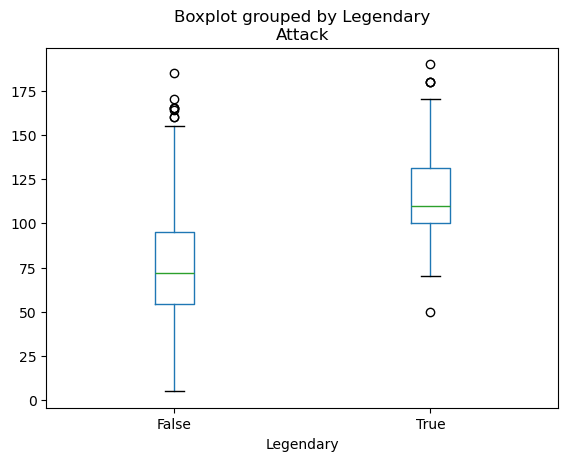

In [28]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Green line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers

data.boxplot(by = 'Legendary', column='Attack', grid = False)
plt.show()


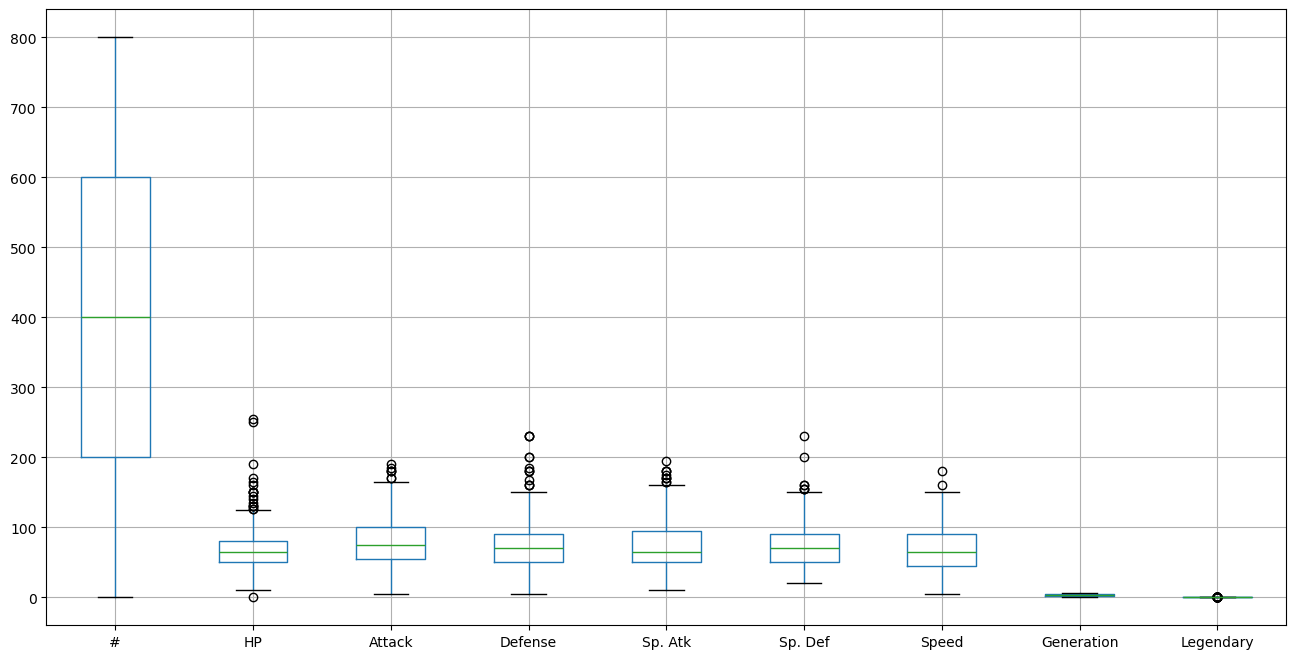

In [29]:
# Creating boxplot subplots 
boxplots = data.boxplot(figsize=(16,8))
plt.show()

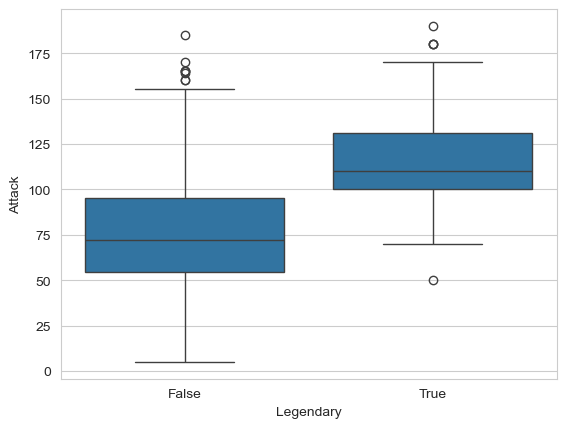

In [30]:
# Fancy looking plots: Seaborn
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Legendary', y = 'Attack', data = data)
plt.show()


### 2.4 Concatenating data

We can concatenate two dataframe 

In [31]:
# First lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [32]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


### 2.5 Data types

There are 5 basic data types: object (string), boolean, integer, float and categorical.
<br> We can convert data types, like from str to categorical or from int to float.
<br> Why is category important: 
* make dataframe smaller in memory 
* can be utilized for anlaysis especially for sklearn

In [33]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [34]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [35]:
# As you can see Type 1 is converted from object to categorical
# Speed is converted from int to float
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

### 2.6 MISSING VALUES
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean


In [36]:
# Lets look at pokemon data that have NaN value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null objects (NaN).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [37]:
# Another way to check this
data['Type 2'].isna().sum()

386

In [38]:
# It is also possible to check the number of NaN elements in one raw (feature vector).
data.loc[[50]].isna().sum().sum()

0

In [39]:
# And in the entire DataFrame.
data.isna().sum().sum()

387

In [40]:
# Lets check Type 2
data["Type 2"].value_counts(dropna =False)
# Again confirmed, there are 386 NAN value

Type 2
NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

In [41]:
# Lets drop NaN values
data1 = data.dropna(axis='columns')
# df.dropna() # Drop the rows where at least one element is missing.
# df.dropna(how='all') # Drop the rows where all elements are missing.
# df.dropna(inplace=True) # Keep the DataFrame with valid entries in the same variable.

In [42]:
# Is this working?
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Type 1      800 non-null    category
 2   HP          800 non-null    int64   
 3   Attack      800 non-null    int64   
 4   Defense     800 non-null    int64   
 5   Sp. Atk     800 non-null    int64   
 6   Sp. Def     800 non-null    int64   
 7   Speed       800 non-null    float64 
 8   Generation  800 non-null    int64   
 9   Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7)
memory usage: 52.4 KB


In [43]:
# Fill missing values
values = {"Name": 'Unknown', "Type 2": 0} # We have two variables (columns) with NaN values - 'Name' and 'Type 2'.
#values = {"Name": 'Unknown', "Type 2": data["Type 2"].mean} # This would make sense if 'Type 2' variable is numerical and we want to replace it with the mean value.
data2 = data.fillna(value=values)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      800 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


### 2.8 DATA INTEGRATION - One hot encoding
Transforming the categorical features into numerical features.


In [44]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Type 1']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)

#view final df
final_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,8,9,10,11,12,13,14,15,16,17
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Some more manipulating of data frames with PANDAS (OPTIONAL)

### 3.1 Indexing data frames

* Indexing using square brackets
* Using column attribute and row label
* Using loc accessor
* Selecting only some columns

In [45]:
# read data
data = pd.read_csv('./input/pokemon.csv')
datav= data.set_index("#")
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [46]:
# indexing using square brackets
data["HP"][1]

60

In [47]:
# using column attribute and row label
data.HP[1]

60

In [48]:
# using loc accessor
data.loc[1,["HP"]]

HP    60
Name: 1, dtype: object

In [49]:
# Selecting only some columns
data[["HP","Attack"]]

,HP,Attack
0,45,49
1,60,62
2,80,82
3,80,100
4,39,52
...,...,...
795,50,100
796,50,160
797,80,110
798,80,160


### 3.2 Slicing data frame
* Difference between selecting columns
    * Series and data frames
* Slicing and indexing series
* Reverse slicing 
* From something to end

In [50]:
# Difference between selecting columns: series and dataframes
print(type(data["HP"]))     # series
print(type(data[["HP"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [51]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"]   # 10 and "Defense" are inclusive

,HP,Attack,Defense
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43
5,58,64,58
6,78,84,78
7,78,130,111
8,78,104,78
9,44,48,65
10,59,63,80


In [52]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"] 

,HP,Attack,Defense
10,59,63,80
9,44,48,65
8,78,104,78
7,78,130,111
6,78,84,78
5,58,64,58
4,39,52,43
3,80,100,123
2,80,82,83
1,60,62,63


In [53]:
# From something to end
data.loc[1:10,"Speed":] 

,Speed,Generation,Legendary
1,60,1,False
2,80,1,False
3,80,1,False
4,65,1,False
5,80,1,False
6,100,1,False
7,100,1,False
8,100,1,False
9,43,1,False
10,58,1,False


### 3.3 Filtering data frames

* Creating filters based on boolean series

* Combining filters

* Filtering based on columns

In [54]:
# Creating filters based on boolean series
boolean = data.HP > 200   # filtering data vectors where HP > 200
print(boolean)
data[boolean]

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: HP, Length: 800, dtype: bool


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [55]:
# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
351,352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
655,656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [56]:
# Filtering based on columns
data.HP[data.Speed<15]

230     20
359     45
486     50
495    135
658     44
Name: HP, dtype: int64

## Attributions and License:

Notebook based on [https://www.kaggle.com/code/kanncaa1/data-sciencetutorial-for-beginners/notebook].

This work is licensed under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0) open source license.